# Seaborn
* https://seaborn.pydata.org/
* https://seaborn.pydata.org/tutorial/introduction.html

Seaborn 是一個基於 Python 的資料視覺化函式庫，它建立於 Matplotlib 之上，並提供更高層次的介面來繪製統計圖形。Seaborn 主要目的是使得繪製複雜的資料圖形變得更加簡單和直觀，並且預設提供了許多美觀的圖形樣式和色彩設計。

### 示範
* https://seaborn.pydata.org/examples/index.html

In [1]:
! pip install seaborn

# Introduction
這一份Notebook只是示範Seaborn的功能，所以下面用到的程式碼先不用深究。後面其他的章節會一步一步詳細的介紹。

# First Look
* https://seaborn.pydata.org/tutorial/introduction.html

In [ ]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


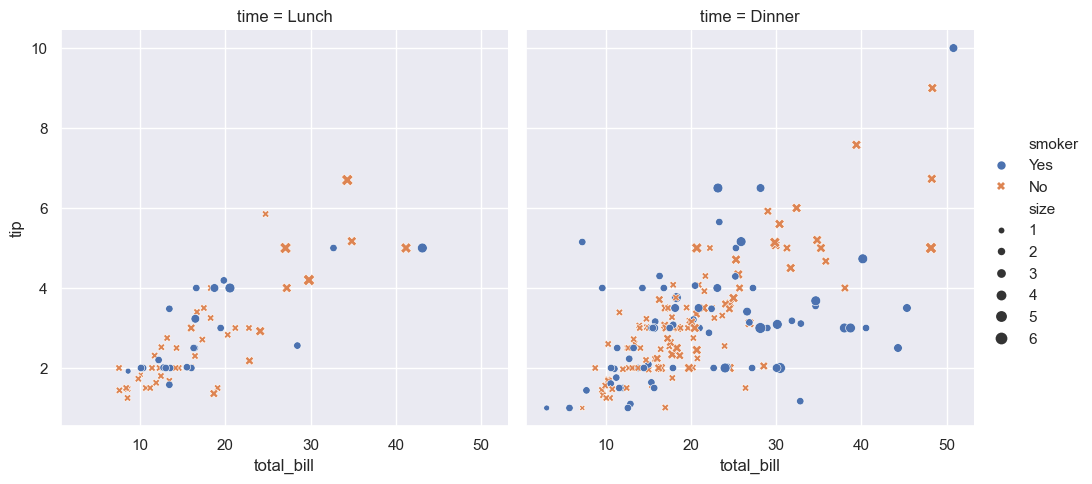

In [ ]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

↑ 同時顯示六個欄位的資訊

# Matplotlib vs Seaborn

In [ ]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


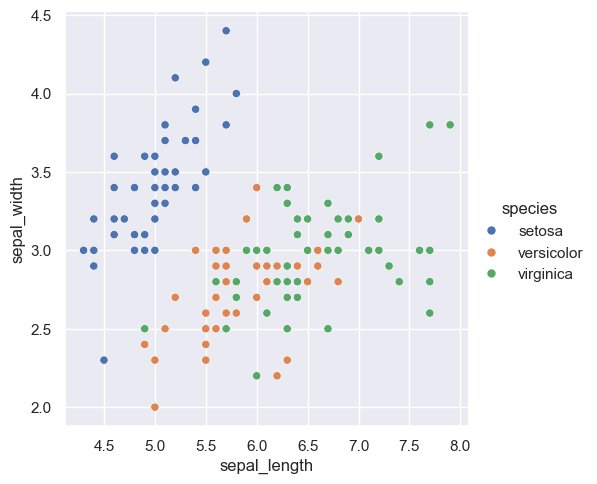

In [ ]:
# 使用Seaborn可以很簡單的繪製
sns.relplot(
    data=iris,
    x="sepal_length", y="sepal_width",hue="species")

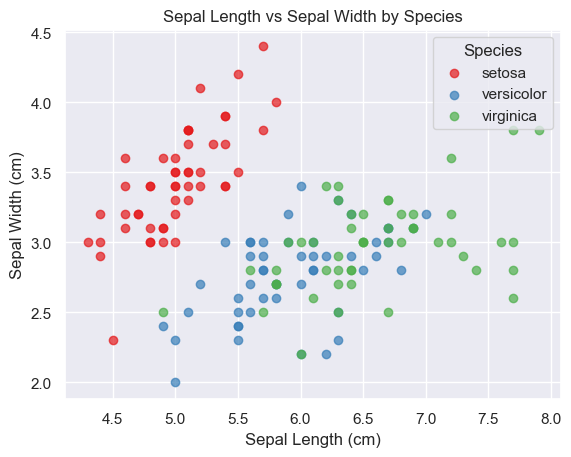

In [ ]:
# 相同的功能如果只用Matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# 取得不同物種的名稱
species = iris['species'].unique()

# 設定顏色對應物種
colors = sns.color_palette("Set1", len(species))

# 根據物種繪製不同顏色的點
for i, sp in enumerate(species):
    species_data = iris[iris['species'] == sp]
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'],
                label=sp, color=colors[i], alpha=0.7)

# 設置標題和軸標籤
plt.title('Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# 顯示圖例
plt.legend(title='Species')

# 顯示圖形
plt.show()


# function relplot()

函數 relplot() 如此命名是因為它旨在視覺化許多不同的統計關係。雖然散佈圖通常很有效，但用一條線更好地表示一個變數代表時間測量的關係

In [ ]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


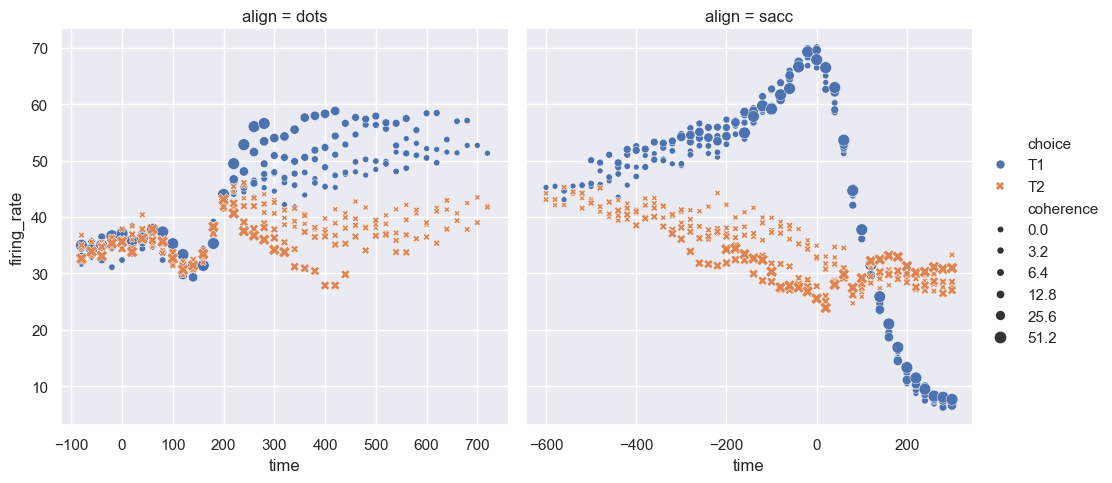

In [ ]:
sns.relplot(
    data=dots,
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

↑ 這裡我們會發現用散佈圖其實不太適合<BR>
↓ 在下面的圖中，可以加入kind這個參數來改變繪圖方式

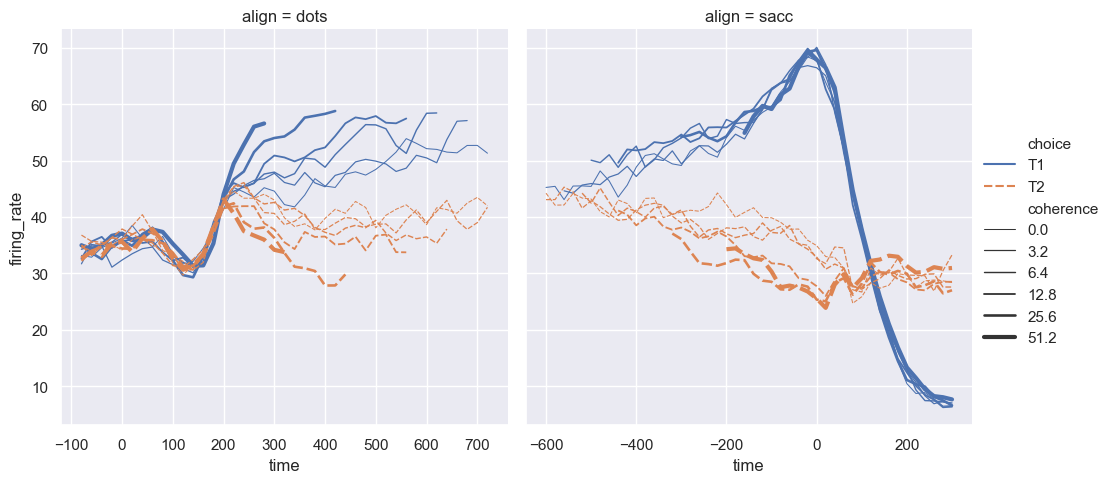

In [ ]:
sns.relplot(
    data=dots, kind="line", #跟前面相比，這裡用了kind這個參數，可以指定使用線圖
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

In [ ]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


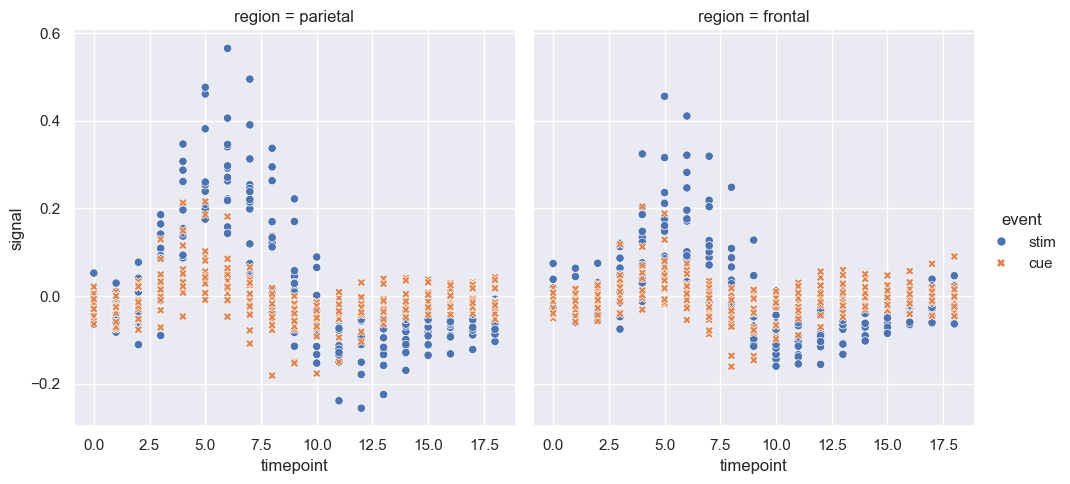

In [ ]:
sns.relplot(
    data=fmri,
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

↑ 同樣的我們會發現用點圖也不太適合

↓ 改成指定用線圖來製圖
通常，我們對一個變數作為其他變數的函數的平均值感興趣。許多seaborn函數將自動執行回答這些問題所需的統計估計：

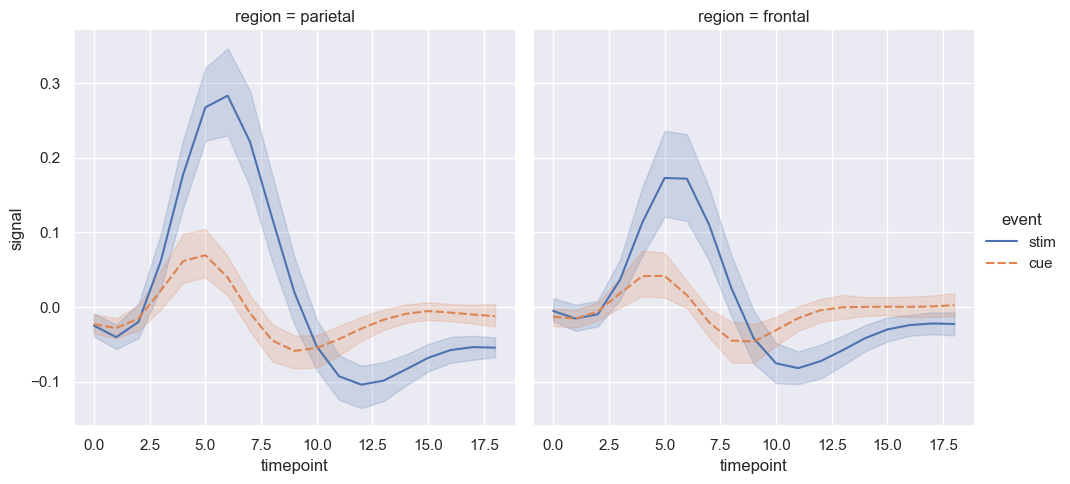

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

### Distributional representations

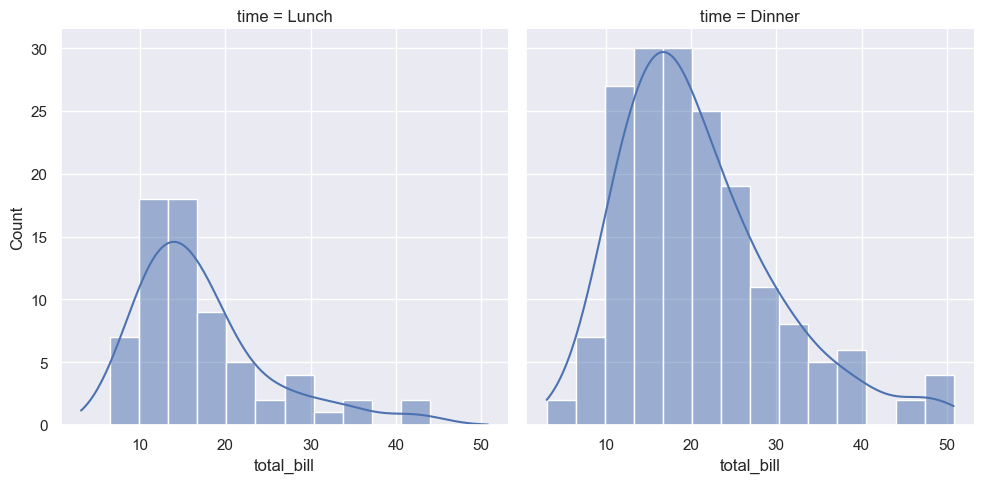

In [ ]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

### Plots for categorical data
Seaborn 中的幾種專用繪圖類型是針對視覺化分類資料。可以透過 catplot() 存取它們。這些圖提供了不同程度的粒度。在最精細的層面上，您可能希望透過繪製「群」圖來查看每個觀察結果：一個散點圖，可調整點沿分類軸的位置，使它們不會重疊：

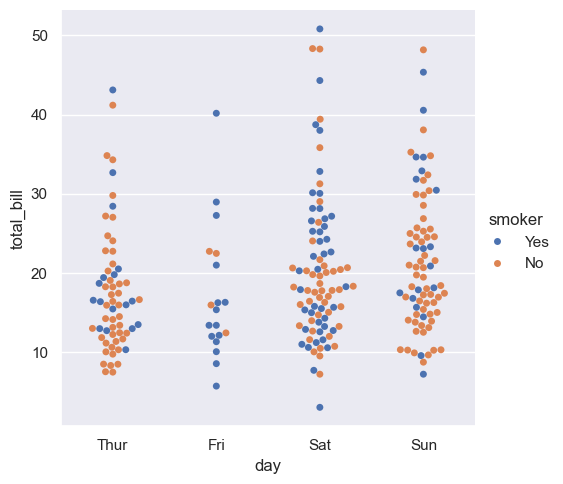

In [ ]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

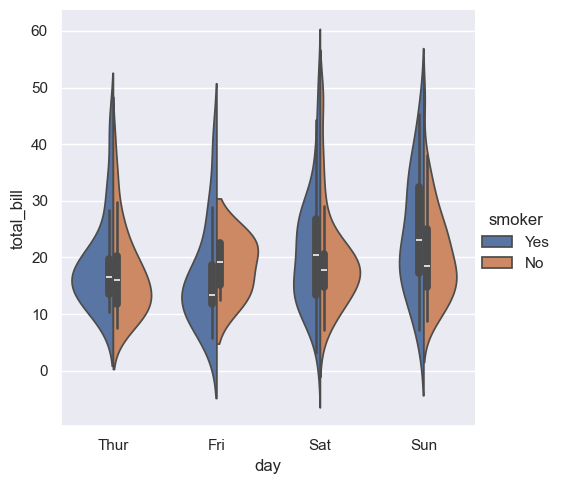

In [ ]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

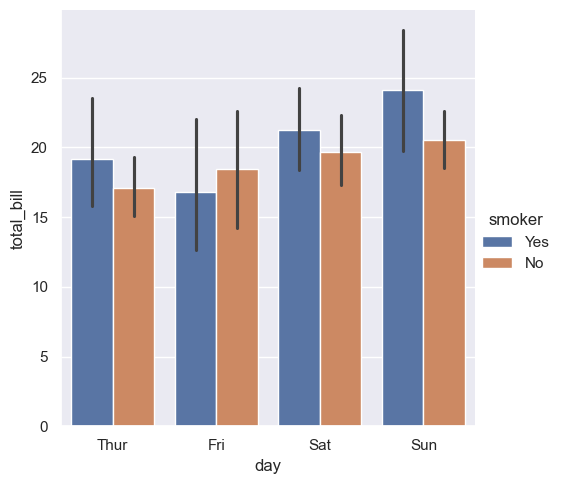

In [ ]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

### Multivariate views on complex datasets
一些seaborn函數結合了多種繪圖來快速給出資料集的資訊摘要。其中之一是 jointplot()，專注於單一關係。它繪製了兩個變數之間的聯合分佈以及每個變數的邊際分佈：

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


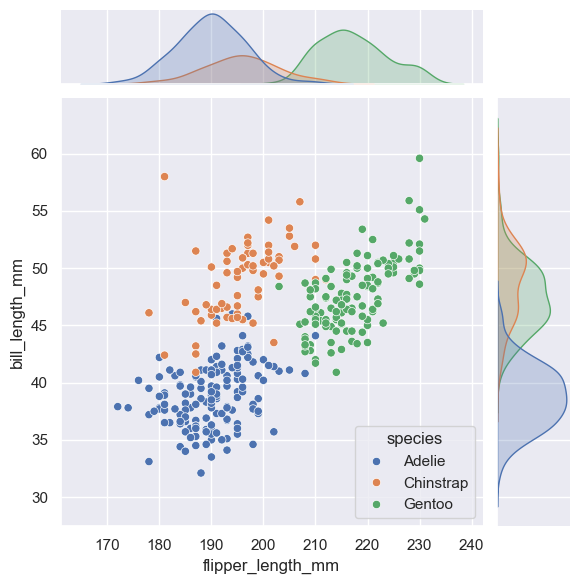

In [ ]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

另一個，pairplot()，具有更廣泛的視角：它分別顯示所有成對關係和每個變數的聯合分佈和邊際分佈：

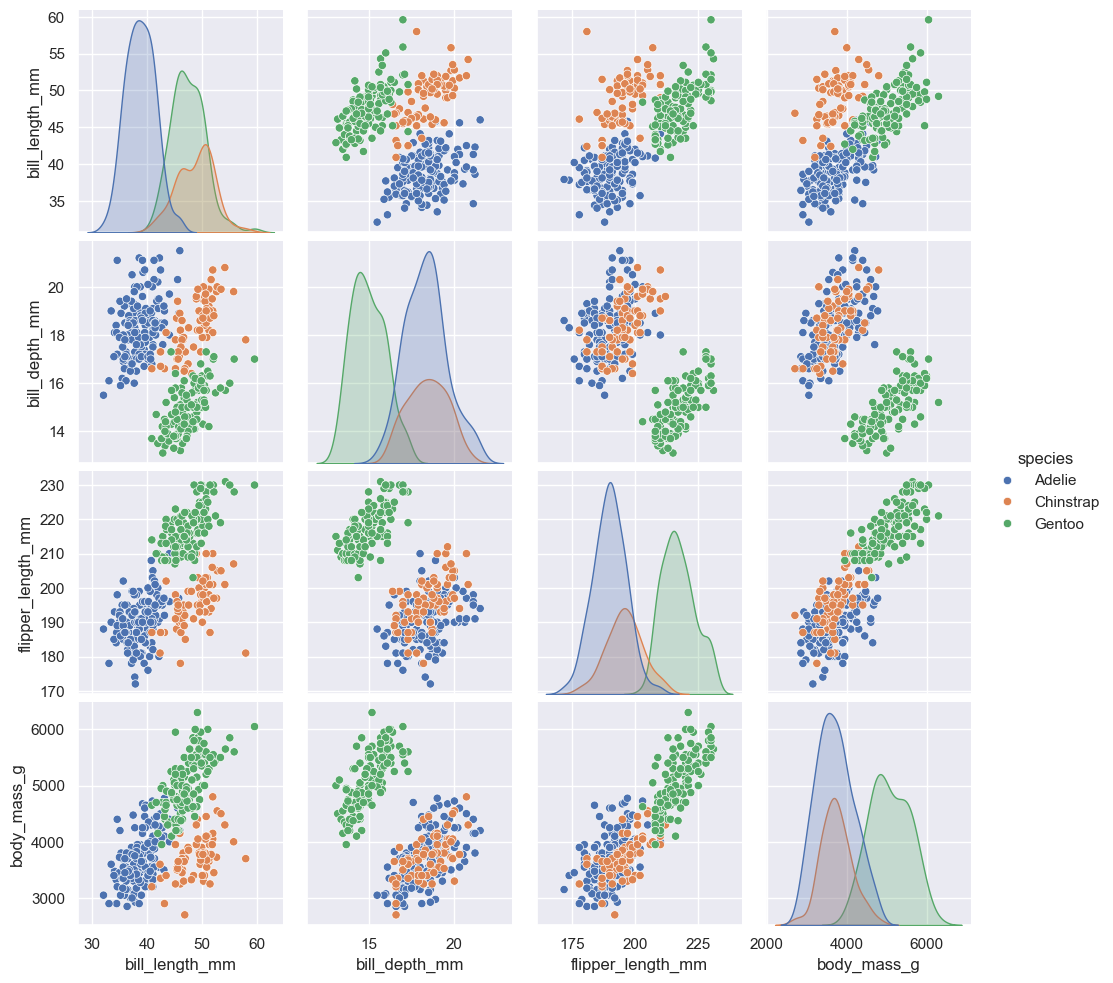

In [ ]:
sns.pairplot(data=penguins, hue="species")

Seaborn 與 matplotlib 的整合可讓您在 matplotlib 支援的多種環境中使用它，包括筆記本中的探索性分析、GUI 應用程式中的即時互動以及多種光柵和向量格式的歸檔輸出。

雖然僅使用 seaborn 函數即可提高工作效率，但圖形的完全自訂將需要對 matplotlib 的概念和 API 有所了解。 Seaborn 新用戶學習曲線的一個方面是知道何時需要下降到 matplotlib 層來實現特定的自訂。另一方面，來自 matplotlib 的用戶會發現他們的大部分知識都在轉移。

Matplotlib 擁有全面且強大的 API；人物的幾乎任何屬性都可以根據您的喜好進行更改。 Seaborn 的高級介面和 matplotlib 的深度可自訂性相結合，使您能夠快速探索數據並創建可自訂為出版品質最終產品的圖形。